**Initialiseren**

In [1]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from sklearn.model_selection import train_test_split
import os

iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris = iris.rename(columns = {'id':'id', 'SepalLengthCm':'sepal.length', 'SepalWidthCm':'sepal.width', 'PetalLengthCm':'petal.length', 'PetalWidthCm':'petal.width', 'Species':'variety'})
iris = iris.drop(columns=['Id'])

array = iris.values
X = array[:,0:4]
Y = array[:,4]

try:
    x = int(input("Wat moet de testgrootte woorden? Getal tussen 0 en 150\n"))
except:
    x = 20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=x/150)
print(f"\nTestgrootte = {x}\nTraingrootte = {150-x}")


Testgrootte = 20
Traingrootte = 130


**Pairplot, boxplot, heatmap van IRIS.csv**

Pairplot van IRIS data


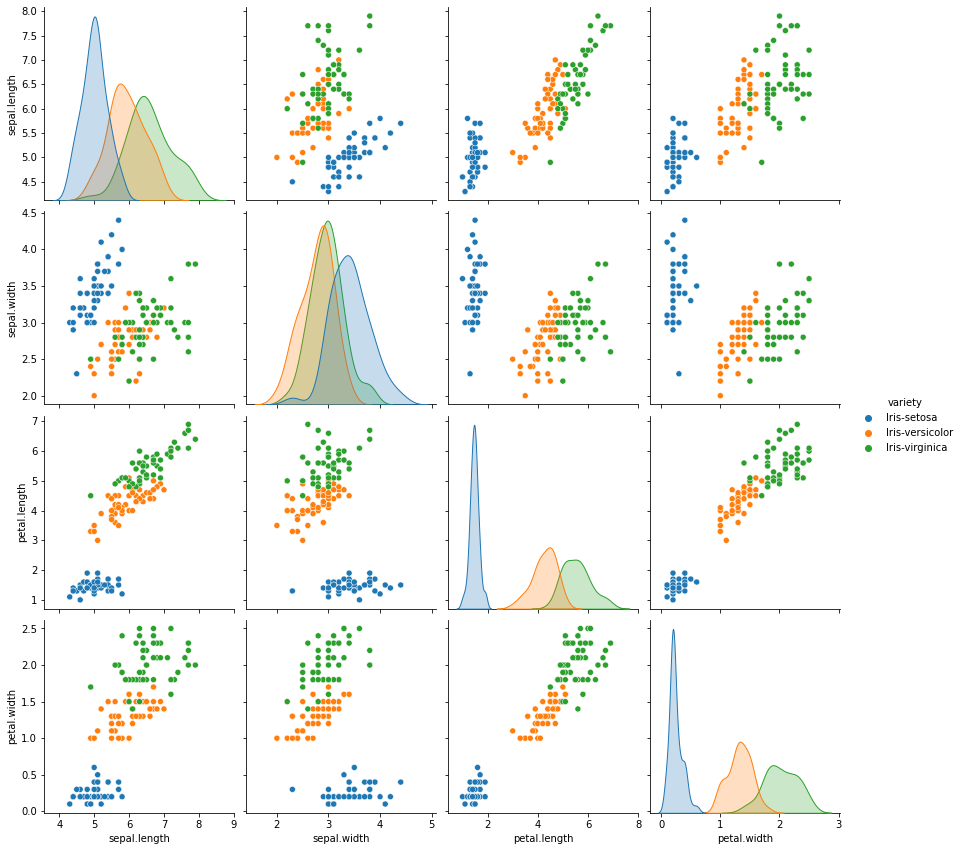


Boxplot van IRIS data 


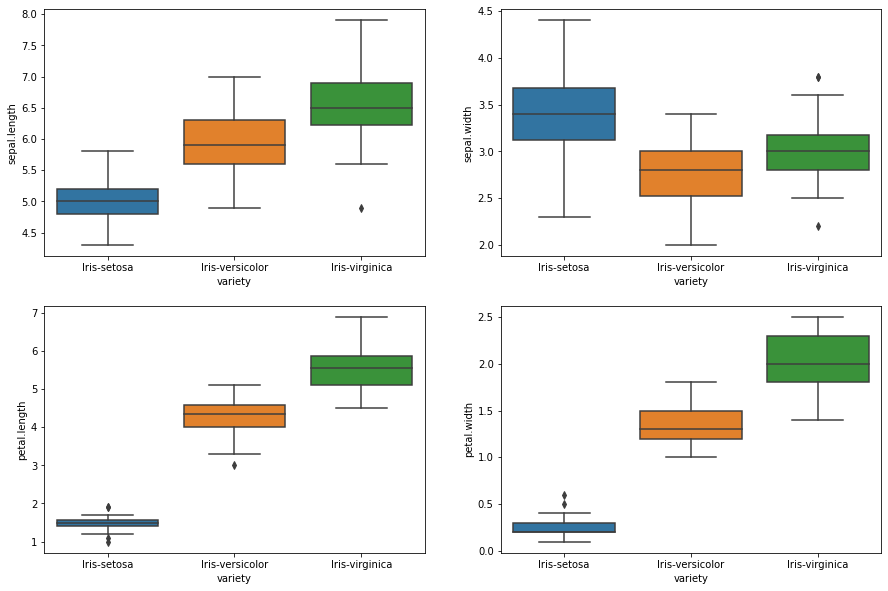


Correlatie heatmap van IRIS data


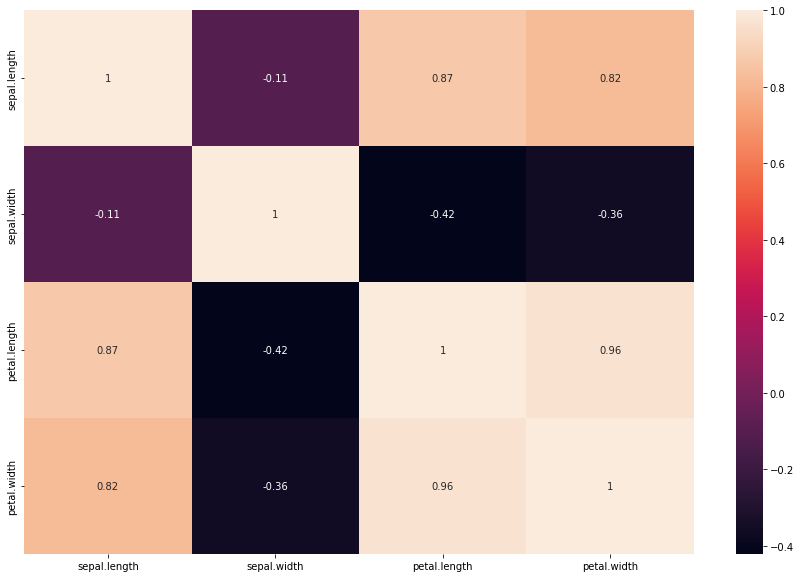

In [2]:
from matplotlib import pyplot as plt

print("Pairplot van IRIS data")
sns.pairplot(iris, hue='variety' , height=3, diag_kind="kde")
plt.show()

print("\nBoxplot van IRIS data ")
plt.figure(figsize=(15,10))
y_vars = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
for i, y_var in enumerate(y_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='variety', y=y_var, data=iris)
plt.show()

print("\nCorrelatie heatmap van IRIS data")
plt.figure(figsize=(15,10))
correlation_matrix = iris.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Trainen, confusionmatrix, scores**

---

- **Decision Tree classifier**

De Decision Tree classifier is een algoritme dat gebruikt wordt voor het maken van beslissingsbomen. Een beslissingsboom is een grafisch model waarbij de interne knooppunten representeren een test op een bepaalde eigenschap van de input en de bladeren representeren een classificatie. Het algoritme werkt door van boven naar beneden in de boom te navigeren en op basis van de waarde van de eigenschap van de input, te bepalen in welke tak je moet gaan. Op deze manier kan de boom een classificatie maken voor de input.

- **K-Neighbors Classifier**

KNeighborsClassifier is een algoritme dat gebruikt wordt voor k-nearest neighbors classificatie. Hierbij wordt gekeken naar de k-aantal (meestal k=5) van de dichtstbijzijnde training-examples (ook wel neighbors genoemd) van een nieuwe input. De classificatie van de nieuwe input wordt bepaald door de meerderheid van de k-neighbors. Hierbij wordt gekeken naar de afstand tussen de nieuwe input en de bestaande examples.


- **Support Vector Machine**

SVM (Support Vector Machine) is een algoritme dat gebruikt wordt voor de classificatie van data. Het werkt door een hyperplane te creëren die de verschillende klassen van de data zo goed mogelijk scheidt. De hyperplane wordt gekozen op basis van de punten (support vectors) die het meest van de andere punten afstaan. Deze punten zijn de belangrijkste punten die worden gebruikt om de hyperplane te bepalen.

---


**Zelftoegevoegde classification methodes**

---

- [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

RandomForestClassifier is een algoritme dat gebruikt wordt voor classificatie. Het werkt door meerdere beslissingsbomen te gebruiken en daarvan de meerderheid te nemen. Hierdoor kan het algoritme betere prestaties geven dan een enkele beslissingsboom.


- [**Logistic Regression**
](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Logistic Regression is een algoritme dat gebruikt wordt voor classificatie. Het werkt door een logistische functie te gebruiken om de kans te berekenen dat een input tot een bepaalde klasse behoort. Hierbij wordt gebruik gemaakt van een lineaire combinatie van de input-features en de parameters die worden geleerd tijdens het trainen van het model.

---




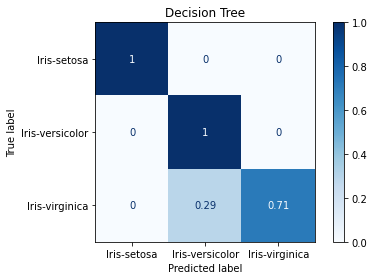

,precision,recall,f1-score,support
Setosa,1.000,1.000,1.000,8.0
Versicolor,0.714,1.000,0.833,5.0
Virginica,1.000,0.714,0.833,7.0
accuracy,0.900,0.900,0.900,0.9
macro avg,0.905,0.905,0.889,20.0
weighted avg,0.929,0.900,0.900,20.0


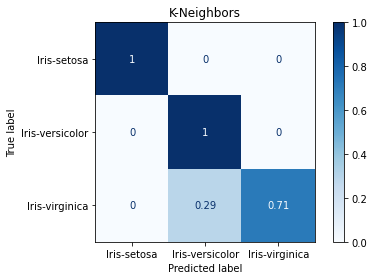

,precision,recall,f1-score,support
Setosa,1.000,1.000,1.000,8.0
Versicolor,0.714,1.000,0.833,5.0
Virginica,1.000,0.714,0.833,7.0
accuracy,0.900,0.900,0.900,0.9
macro avg,0.905,0.905,0.889,20.0
weighted avg,0.929,0.900,0.900,20.0


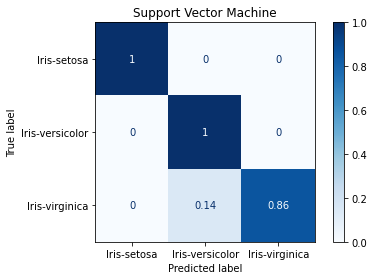

,precision,recall,f1-score,support
Setosa,1.000,1.000,1.000,8.00
Versicolor,0.833,1.000,0.909,5.00
Virginica,1.000,0.857,0.923,7.00
accuracy,0.950,0.950,0.950,0.95
macro avg,0.944,0.952,0.944,20.00
weighted avg,0.958,0.950,0.950,20.00


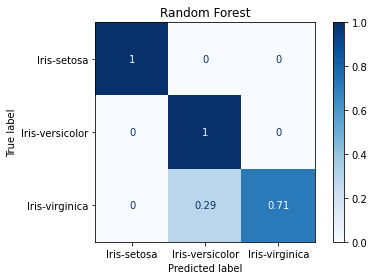

,precision,recall,f1-score,support
Setosa,1.000,1.000,1.000,8.0
Versicolor,0.714,1.000,0.833,5.0
Virginica,1.000,0.714,0.833,7.0
accuracy,0.900,0.900,0.900,0.9
macro avg,0.905,0.905,0.889,20.0
weighted avg,0.929,0.900,0.900,20.0


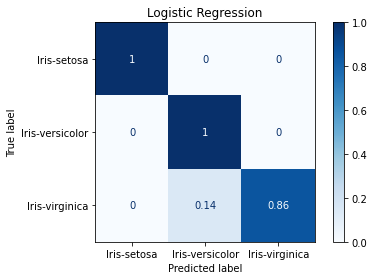

,precision,recall,f1-score,support
Setosa,1.000,1.000,1.000,8.00
Versicolor,0.833,1.000,0.909,5.00
Virginica,1.000,0.857,0.923,7.00
accuracy,0.950,0.950,0.950,0.95
macro avg,0.944,0.952,0.944,20.00
weighted avg,0.958,0.950,0.950,20.00


In [3]:
try:
    komma = input("Op hoeveel getallen achter de komma wil je afronden? Aanbevolen: 3\n")
    while not komma.isnumeric() or int(komma) < 0:
        komma = input("Ongeldige antwoord. Op hoeveel getallen achter de komma wil je afronden? Aanbevolen: 3\n")
except:
    komma = 3


try:
    neighbors = input("Hoeveel neighbors bij de KNN Classificatie? Aanbevolen: 2\n")
    while not neighbors.isnumeric() or int(neighbors) < 0:
        neighbors = input("Ongeldige antwoord. Hoeveel neighbors bij de KNN Classificatie? Aanbevolen: 2\n")
except:
    neighbors = 2

classifiers = {'Decision Tree': sk.tree.DecisionTreeClassifier(),
               'K-Neighbors': sk.neighbors.KNeighborsClassifier(n_neighbors=int(neighbors)),
               'Support Vector Machine': sk.svm.SVC(),
               'Random Forest': RandomForestClassifier(), 
              'Logistic Regression': LogisticRegression(max_iter=1000)}

if not os.path.exists('saves'):
    os.makedirs('saves')

for clf_name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cm = sk.metrics.confusion_matrix(Y_test, Y_pred, labels=clf.classes_, normalize='true')
    disp = sk.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap='Blues')
    plt.title(clf_name)
    plt.tight_layout()
    plt.savefig('saves/' + clf_name + '_confusion_matrix.png')
    plt.show()

    classification_report = sk.metrics.classification_report(Y_test, Y_pred, target_names=["Setosa", "Versicolor", "Virginica"], output_dict=True, zero_division=0)
    classification_df = pd.DataFrame(classification_report).transpose()
    classification_df = classification_df.reindex(["Setosa", "Versicolor", "Virginica", "accuracy", "macro avg", "weighted avg"])
    classification_df = classification_df.round(int(komma))
    classification_df.to_csv('saves/' + clf_name + '_classification_report.csv', mode='w', index=False)
    display(classification_df)
    print(" ")